# Convolutional Neural Network

### Importing the libraries

In [46]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [47]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [48]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


### Preprocessing the Validation set

In [49]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = validation_datagen.flow_from_directory('val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 16 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [50]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [51]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [52]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [53]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [54]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [55]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [56]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [57]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Validation set

In [88]:
EPOCH_SIZE = 2 #change this to 25 for better accuracy, using 5 for speed

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
cnn.fit(x = training_set, validation_data = validation_set, epochs = EPOCH_SIZE, callbacks=[tensorboard_callback])

Epoch 1/2
163/163 [==============================] - 43s 266ms/step - loss: 0.1216 - accuracy: 0.9553 - val_loss: 0.7254 - val_accuracy: 0.6250
Epoch 2/2
163/163 [==============================] - 39s 239ms/step - loss: 0.1105 - accuracy: 0.9572 - val_loss: 0.8592 - val_accuracy: 0.6250


### Visualizing Loss and Accuracy

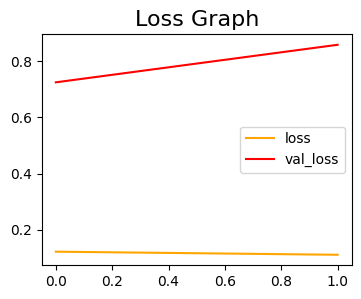

In [112]:
from matplotlib import pyplot as plt

plt.figure(figsize=(4,3))
plt.plot(cnn.history.history['loss'], color='orange', label='loss')
plt.plot(cnn.history.history['val_loss'], color='red', label='val_loss')
plt.title('Loss Graph', fontsize=16)
plt.legend(loc="center right")
plt.show()

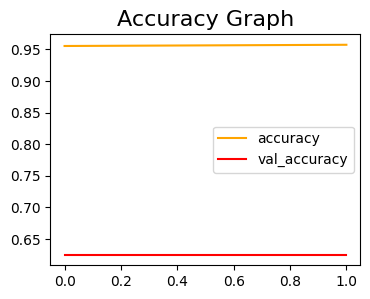

In [113]:
plt.figure(figsize=(4,3))
plt.plot(cnn.history.history['accuracy'], color='orange', label='accuracy')
plt.plot(cnn.history.history['val_accuracy'], color='red', label='val_accuracy')
plt.title('Accuracy Graph', fontsize=16)
plt.legend(loc='center right')
plt.show()

## Part 4 - Making predictions

In [69]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('test', target_size = (64, 64), batch_size = 1, class_mode = 'binary', shuffle=False)

Found 624 images belonging to 2 classes.


In [70]:
import numpy as np

predictions = cnn.predict_generator(test_set, steps=len(test_set), verbose=1)

y_pred = np.rint(predictions).astype(int)

labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predicted_labels = [labels[p[0]] for p in y_pred]

for file, prediction in zip(test_set.filenames, predicted_labels):
    print(f'Prediction for {file}: {prediction}')

  5/624 [..............................] - ETA: 8s 

C:\Users\Dell\AppData\Local\Temp\ipykernel_18264\1874418497.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = cnn.predict_generator(test_set, steps=len(test_set), verbose=1)


624/624 [==============================] - 5s 7ms/step
Prediction for NORMAL\IM-0001-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0003-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0005-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0006-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0007-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0009-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0010-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0011-0001-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0011-0001-0002.jpeg: NORMAL
Prediction for NORMAL\IM-0011-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0013-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0015-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0016-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0017-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0019-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0021-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0022-0001.jpeg: PNEUMONIA
Prediction for NORMAL\IM-0023-0001.jpeg: NORMAL
Prediction for NORMAL\IM-0025-0001.jpeg: NORMAL
Prediction for

### Showing Metrics

In [90]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

y_true = test_set.classes

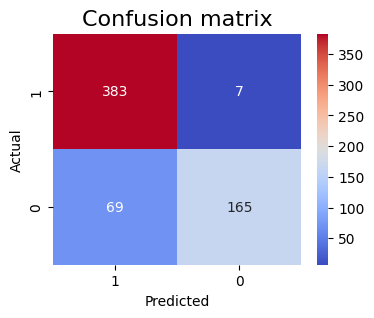

In [129]:
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d',cmap='coolwarm',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion matrix', fontsize=16)

ax.invert_yaxis()
ax.invert_xaxis()

plt.show()

In [135]:
from tabulate import tabulate

f1 = f1_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

headers = ["Metric", "Value"]
values = [["F1 Score", f"{f1:.4f}"],
          ["Recall", f"{recall:.4f}"],
          ["Precision", f"{precision:.4f}"],
          ["Accuracy", f"{accuracy:.4f}"]]

# Create and print the table
print(tabulate(values, headers, tablefmt="pretty"))

+-----------+--------+
|  Metric   | Value  |
+-----------+--------+
| F1 Score  | 0.9097 |
|  Recall   | 0.9821 |
| Precision | 0.8473 |
| Accuracy  | 0.8782 |
+-----------+--------+
